In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.image import imread 
import cv2 as cv
import math as m

In [10]:
image1 = cv.imread('/home/gadha/Desktop/ISP_2024/Lab1/cells_scale.png')
h,w,l = image1.shape
h,w,l
ax = 1.3
ay = 1.3

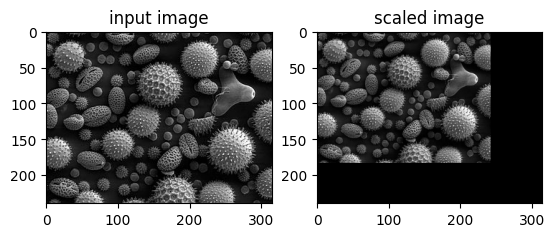

In [6]:



target = np.zeros_like(image1) # Initialising target image array with all zero array with same shape as the source image
 
'''

bilinear interpolation function
Input: Source image, tx and ty coordinates
Output: returns the target image

'''
 
def bilinear_interpolation(input,ax):
 for i in range(h):
    for j in range(w):
        x = ax*i
        y = ax*j

        x_ = m.floor(x)
        y_ = m.floor(y)
        a = x - x_
        b = y - y_

        if x<0 or x>=h-1 or y<0 or y>w-1:
            target[i,j] = 0
        else:

            It_1 = (1 - a) * (1 - b) * input[x_, y_]
            It_2 = (1 - a) * b * input[x_, y_ + 1]
            It_3 = a * b * input[x_ + 1, y_ + 1]
            It_4= a * (1 - b) * input[x_ + 1, y_]

            target[i,j] = It_1 + It_2 + It_3 + It_4
 
 return target
      
# target = bilinear_interpolation(image1,tx,ty)
# print(target)
            
output1 = bilinear_interpolation (image1, ax) #
fig = plt.figure()
row = 1
column = 2
fig.add_subplot(row,column , 1)
plt.imshow(image1 ,cmap = 'gray')
plt.title('input image')

fig.add_subplot(row,column , 2)
plt.imshow(target,cmap = 'gray')
plt.title('scaled image')

plt.show()

    resized_image = np.zeros((resize_width, resize_height, channel), dtype=np.uint8)


[[1.25       0.         0.        ]
 [0.         0.76923077 0.        ]
 [0.         0.         1.        ]]


Text(0.5, 1.0, 'scaled image')

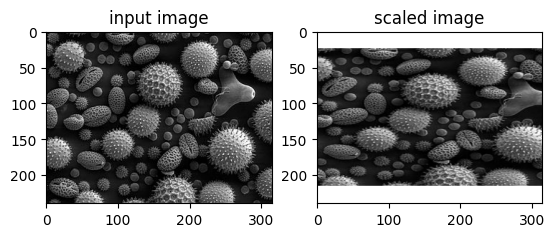

In [47]:
image1 = cv.imread('/home/gadha/Desktop/ISP_2024/Lab1/cells_scale.png')
h,w,l = image1.shape
# h,w,l
# plt.imshow(image)
h_mid, w_mid = (h//2,w//2)
# w_mid
target = np.zeros_like(image1)
a = 0.8
b = 1.3
# image_mat = np.array([i , j , 1])
# source_mat = image_mat.reshape((3,1))
rotation_mat = np.array([[a , 0 , 0],
                        [0 , b , 0],
                        [0 , 0 , 1]])
inv_mat = np.linalg.inv(rotation_mat)
print(inv_mat)


# target_mat
# FINAL 


for i in range(h):
    for j in range(w):
      image_mat = np.array([i - h_mid , j - w_mid , 1])
      source_mat = image_mat.reshape((3,1))
      target_mat = np.matmul(inv_mat , source_mat)
      x = target_mat[0,0] + h_mid
      y = target_mat[1 , 0] + w_mid
      x_ = m.floor(x)
      y_ = m.floor(y)
      a = x - x_
      b = y - y_
     
            
      if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
          It_1 = (1 - a) * (1 - b) * image1[x_, y_]
          It_2 = (1 - a) * b * image1[x_, y_ + 1]
          It_3 = a * b * image1[x_ + 1, y_ + 1]
          It_4= a * (1 - b) * image1[x_ + 1, y_]

          target[i,j] = It_1 + It_2 + It_3 + It_4
      else:
          target[i,j] = 255

# plt.imshow(target , cmap = 'gray')
fig = plt.figure()
row = 1
column = 2
fig.add_subplot(row,column , 1)
plt.imshow(image1 ,cmap = 'gray')
plt.title('input image')

fig.add_subplot(row,column , 2)
plt.imshow(target,cmap = 'gray')
plt.title('scaled image')


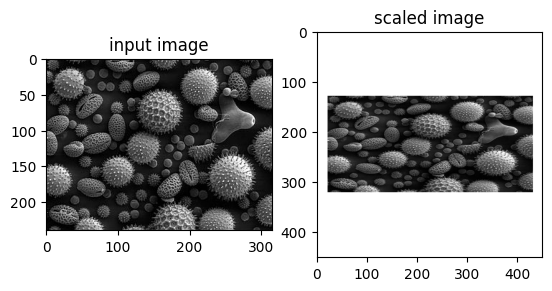

In [52]:

#base code (without fn)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as m

image1 = cv.imread('/home/gadha/Desktop/ISP_2024/Lab1/cells_scale.png')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY) 
h, w = image1.shape
h_mid, w_mid = (h // 2, w // 2)

target = np.zeros((450, 450), dtype=np.uint8)  
ht, wt = target.shape
a = 0.8
b = 1.3

rotation_mat = np.array([[a, 0, 0],
                        [0, b, 0],
                        [0, 0, 1]])
inv_mat = np.linalg.inv(rotation_mat)

for i in range(ht):
    for j in range(wt):
        image_mat = np.array([i - ht//2, j - wt//2, 1])  
        target_mat = image_mat.reshape((3, 1))
        source_mat = np.matmul(inv_mat, target_mat)

        x = source_mat[0, 0] + h_mid
        y = source_mat[1, 0] + w_mid
        x_ = m.floor(x)
        y_ = m.floor(y)
        a = x - x_
        b = y - y_

        if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
            It_1 = (1 - a) * (1 - b) * image1[x_, y_]
            It_2 = (1 - a) * b * image1[x_, y_ + 1]
            It_3 = a * b * image1[x_ + 1, y_ + 1]
            It_4 = a * (1 - b) * image1[x_ + 1, y_]

            target[i, j] = It_1 + It_2 + It_3 + It_4
        else:
            target[i, j] = 255

fig = plt.figure()
row = 1
column = 2
fig.add_subplot(row, column, 1)
plt.imshow(image1, cmap='gray')  
plt.title('input image')

fig.add_subplot(row, column, 2)
plt.imshow(target, cmap='gray')
plt.title('scaled image')

plt.show()


In [1]:
# trial using function
# yayy this is working code 

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as m

image1 = cv.imread('/home/gadha/Desktop/ISP_2024/Lab1/cells_scale.png')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY) 
h, w = image1.shape
h_mid, w_mid = (h // 2, w // 2)

target = np.zeros((450, 450), dtype=np.uint8)  
ht, wt = target.shape
# a = 0.8
# b = 1.3

# rotation_mat = np.array([[a, 0, 0],
#                         [0, b, 0],
#                         [0, 0, 1]])
# inv_mat = np.linalg.inv(rotation_mat)
           
def bilinear_interpolation(input, x, y):
    x_ = m.floor(x)
    y_ = m.floor(y)
    a = x - x_
    b = y - y_

    if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
        It_1 = (1 - a) * (1 - b) * input[x_, y_]
        It_2 = (1 - a) * b * input[x_, y_ + 1]
        It_3 = a * b * input[x_ + 1, y_ + 1]
        It_4 = a * (1 - b) * input[x_ + 1, y_]

        return It_1 + It_2 + It_3 + It_4
    else:
        return 0
    
def scaling(input , x_scale , y_scale) :
    target = np.zeros(450, 450)
    ht, wt = target.shape
    s1 = x_scale
    s2 = y_scale

    rotation_mat = np.array([[s1, 0, 0],
                            [0, s2, 0],
                            [0, 0, 1]])
    inv_mat = np.linalg.inv(rotation_mat)

    for i in range(ht):
        for j in range(wt):
            image_mat = np.array([i - ht//2, j - wt//2, 1])  
            target_mat = image_mat.reshape((3, 1))
            source_mat = np.matmul(inv_mat, target_mat)
            x, y = source_mat[0] + h_mid, source_mat[1] + w_mid
            target[i, j] = bilinear_interpolation (input , x , y )
    return target

 

output = scaling(image1 , 0.8 , 1.3)         
fig = plt.figure()
row = 1
column = 2
fig.add_subplot(row, column, 1)
plt.imshow(image1, cmap='gray')  
plt.title('input image')

fig.add_subplot(row, column, 2)
plt.imshow(target, cmap='gray')
plt.title('scaled image')

plt.show()


TypeError: Cannot interpret '450' as a data type

In [21]:
target = np.zeros((300,300))
ht , wt = target.shape
a = 0.8
b = 1.3
# image_mat = np.array([i , j , 1])
# source_mat = image_mat.reshape((3,1))
rotation_mat = np.array([[a , 0 , 0],
                        [0 , b , 0],
                        [0 , 0 , 1]])
inv_mat = np.linalg.inv(rotation_mat)
print(inv_mat)
for i in range(h):
  for j in range(w):
    image_mat = np.array([i - h_mid , j - w_mid , 1])
    source_mat = image_mat.reshape((3,1))
    target_mat = np.matmul(rotation_mat , source_mat)


target_mat


[[1.25       0.         0.        ]
 [0.         0.76923077 0.        ]
 [0.         0.         1.        ]]


array([[ 95.2],
       [204.1],
       [  1. ]])

In [23]:
# FINAL 


for i in range(ht):
    for j in range(wt):
      image_mat = np.array([i - h_mid , j - w_mid , 1])
      source_mat = image_mat.reshape((3,1))
      target_mat = np.matmul(inv_mat , source_mat)
      x = target_mat[0,0] + h_mid
      y = target_mat[1 , 0] + w_mid
      x_ = m.floor(x)
      y_ = m.floor(y)
      a = x - x_
      b = y - y_
      # x, x_ , y , y_ , a , b
      
      # if (x_ <0 or x_ >=h - 1) and (y_ <0 or y_ > w - 1):
      #       target[i,j] = 0
      #     # print(".")
      # #     print(x_ , y_)

      
      # else:
            
      #       It_1 = (1 - a) * (1 - b) * image[x_, y_]
      #       It_2 = (1 - a) * b * image[x_, y_ + 1]
      #       It_3 = a * b * image[x_ + 1, y_ + 1]
      #       It_4= a * (1 - b) * image[x_ + 1, y_]

      #       target[i,j] = It_1 + It_2 + It_3 + It_4
      #     # print(x_ , y_)
            
      if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
          It_1 = (1 - a) * (1 - b) * image1[x_, y_]
          It_2 = (1 - a) * b * image1[x_, y_ + 1]
          It_3 = a * b * image1[x_ + 1, y_ + 1]
          It_4= a * (1 - b) * image1[x_ + 1, y_]

          target[i,j] = It_1 + It_2 + It_3 + It_4
      else:
          target[i,j] = 255

# plt.imshow(target , cmap = 'gray')
fig = plt.figure()
row = 1
column = 2
fig.add_subplot(row,column , 1)
plt.imshow(image1 ,cmap = 'gray')
plt.title('input image')

fig.add_subplot(row,column , 2)
plt.imshow(target,cmap = 'gray')
plt.title('scaled image')


ValueError: setting an array element with a sequence.

In [72]:

#base code (without fn)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as m

image1 = cv.imread('/home/gadha/Desktop/ISP_2024/Lab1/cells_scale.png')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY) 
h, w = image1.shape
h_mid, w_mid = (h // 2, w // 2)

target = np.zeros((400, 400), dtype=np.uint8)  
ht, wt = target.shape
a = 0.8
b = 1.3

rotation_mat = np.array([[a, 0, 0],
                        [0, b, 0],
                        [0, 0, 1]])
inv_mat = np.linalg.inv(rotation_mat)

for i in range(ht):
    for j in range(wt):
        image_mat = np.array([i - ht//2, j - wt//2, 1])  
        # print((i - ht//2),(i - ht//2))
        target_mat = image_mat.reshape((3, 1))
        source_mat = np.matmul(inv_mat, target_mat)

        x = source_mat[0, 0] + h_mid
        y = source_mat[1, 0] + w_mid
        print((x,y))
#         x_ = m.floor(x)
#         y_ = m.floor(y)
#         a = x - x_
#         b = y - y_

#         if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
#             It_1 = (1 - a) * (1 - b) * image1[x_, y_]
#             It_2 = (1 - a) * b * image1[x_, y_ + 1]
#             It_3 = a * b * image1[x_ + 1, y_ + 1]
#             It_4 = a * (1 - b) * image1[x_ + 1, y_]

#             target[i, j] = It_1 + It_2 + It_3 + It_4
#         else:
#             target[i, j] = 255

# fig = plt.figure()
# row = 1
# column = 2
# fig.add_subplot(row, column, 1)
# plt.imshow(image1, cmap='gray')  
# plt.title('input image')

# fig.add_subplot(row, column, 2)
# plt.imshow(target, cmap='gray')
# plt.title('scaled image')

# plt.show()


(-130.0, 3.1538461538461604)
(-130.0, 3.923076923076934)
(-130.0, 4.692307692307708)
(-130.0, 5.461538461538481)
(-130.0, 6.230769230769255)
(-130.0, 7.0)
(-130.0, 7.769230769230774)
(-130.0, 8.538461538461547)
(-130.0, 9.30769230769232)
(-130.0, 10.076923076923094)
(-130.0, 10.846153846153868)
(-130.0, 11.615384615384642)
(-130.0, 12.384615384615387)
(-130.0, 13.15384615384616)
(-130.0, 13.923076923076934)
(-130.0, 14.692307692307708)
(-130.0, 15.461538461538481)
(-130.0, 16.230769230769255)
(-130.0, 17.0)
(-130.0, 17.769230769230774)
(-130.0, 18.538461538461547)
(-130.0, 19.30769230769232)
(-130.0, 20.076923076923094)
(-130.0, 20.846153846153868)
(-130.0, 21.61538461538464)
(-130.0, 22.384615384615387)
(-130.0, 23.15384615384616)
(-130.0, 23.923076923076934)
(-130.0, 24.692307692307708)
(-130.0, 25.46153846153848)
(-130.0, 26.230769230769255)
(-130.0, 27.0)
(-130.0, 27.769230769230774)
(-130.0, 28.538461538461547)
(-130.0, 29.30769230769232)
(-130.0, 30.076923076923094)
(-130.0, 30.8